# Update ArcGIS Item Contents
## Connect to ArcGIS Online (AGOL)

In [1]:
pro = False

In [2]:
if (pro):
    from arcgis import GIS
    gis = GIS('pro')

else:
    from main import *
    gis = arcgisUM.getArcGISConnection(config.ArcGIS.SECURITYINFO)

print( 'Login successful!' )
print( '  server: ' + gis.properties.name )
print( '  user: ' + gis.properties.user.username )
print( '  role: ' + gis.properties.user.role )

gis

Login successful!
  server: University of Michigan (Dev)
  user: agolcanvas
  role: org_admin


## Find a StoryMap

In [3]:
storyMapId = '3e985c1fbbeb41c1970c58a8b78262a6'

<Item title:"Jewish Paths to Urbanization" type:Web Mapping Application owner:zimchris_devumich>
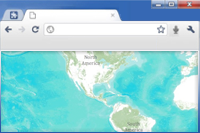

In [4]:
items = gis.content.search(query='id:' + storyMapId)
storyMap = items[0]
storyMap

In [ ]:
storyMapData = storyMap.get_data()
if (storyMapData is None):
    raise Exception('⚠️Unable to get StoryMap data!')
    
storyMapData

## Replace Some Content

### Find Content To Be Changed

In [6]:
introBefore = storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value']
introBefore

'<p class="block">Beginning in the 19th century Jews from all over the Pale of Settlements began coming to Odessa (2018-06-06T21:34:59.234250+00:00)</p>'

### Generate Replacement Content
Generate an ISO 8601 timestamp to be added to the "introduction" content chosen above.

In [7]:
from datetime import datetime, timezone
currentTime = datetime.now(timezone.utc)
isoTimestamp = currentTime.isoformat()
isoTimestamp

'2018-06-07T14:48:31.913840+00:00'

### Find Insertion Point
Find the place in the introduction to replace (or add) with the ISO 8601 timestamp.

In [8]:
endIndex = introBefore.find('</p>')
timestampIndex = introBefore.find(str(currentTime.year))
timestampIndex = endIndex if (timestampIndex < 0) else (timestampIndex - 2)
introAfter = introBefore[:timestampIndex] + ' (' + isoTimestamp + ')' + introBefore[endIndex:]
introAfter

'<p class="block">Beginning in the 19th century Jews from all over the Pale of Settlements began coming to Odessa (2018-06-07T14:48:31.913840+00:00)</p>'

In [9]:
storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value'] = introAfter

## Display New JSON

In [ ]:
import json
json.dumps(storyMapData)

## Update StoryMap in AGOL
Notice the use of `StringIO` to avoid using files.

In [11]:
from io import StringIO
with StringIO(json.dumps(storyMapData)) as f:
    storyMap.update(data=f.read())

## Find Updated StoryMap

<Item title:"Jewish Paths to Urbanization" type:Web Mapping Application owner:zimchris_devumich>
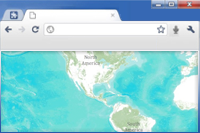

In [12]:
items = gis.content.search(query='id:' + storyMapId)
storyMap = items[0]
storyMap

In [ ]:
storyMapData = storyMap.get_data()
storyMapData

In [14]:
storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value']

'<p class="block">Beginning in the 19th century Jews from all over the Pale of Settlements began coming to Odessa (2018-06-07T14:48:31.913840+00:00)</p>'

## Verify Update

In [15]:
if (storyMapData['values']['sections'][1]['foreground']['blocks'][0]['text']['value'] == introAfter):
    print('✅Change verified!')
else:
    print('⚠️Unable to verify change!')

✅Change verified!
